# Time Series Prediction


In [242]:
# @ Lukman copyright 
# MIT Licence

In [4]:
# for data frame analysis
import pandas as pd 

# for mathematical operations
import numpy as np 

# imports below are for plotly 
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.figure_factory as ff
import plotly.offline as offline


# matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# For Normalizing data
from sklearn.preprocessing import StandardScaler

# For statistical test
import scipy.stats as stats

# Split data set into training and test set
from sklearn.model_selection import train_test_split as tts

# SVN module
from sklearn import svm

# Kernel Functions used 
from sklearn.metrics.pairwise import rbf_kernel,laplacian_kernel

# module for chi square test
from scipy.stats import chisquare

### To make Bokeh Plot 
import map_maker

# For dictionary 
from collections import defaultdict


# Data Preprocessing 

In [5]:
# Import the dataset 
# skip 2 rows since 
OutputData = pd.read_excel('population.xlsx',skiprows=range(0, 2)) 

In [6]:
OutputData = pd.read_csv('sales_technical_test.csv') 

In [7]:
# data types are objects
OutputData.dtypes

timestamp    object
tot           int64
storeId       int64
dtype: object

In [8]:
# chnage timestamo to date time data type
OutputData['timestamp'] =  pd.to_datetime(OutputData['timestamp'])
OutputData.dtypes

timestamp    datetime64[ns]
tot                   int64
storeId               int64
dtype: object

In [9]:
OutputData.dtypes # check the data type has changed

timestamp    datetime64[ns]
tot                   int64
storeId               int64
dtype: object

In [10]:
OutputData.set_index('timestamp',inplace=True);


In [11]:
storeOne = OutputData.loc[OutputData['storeId'] == 1] # store one
storeTwo = OutputData.loc[OutputData['storeId'] == 2] # store two

In [12]:
# Usually one would also need to read about the data collection process . This is so as to understand what each
# column and headers stands for. And in particular what assumptions have been made by the collectors
# of the data.

In [31]:
# view the dataset using plotly for good visualization
df = ff.create_table(storeOne.head())
offline.iplot(df)


Text(0,0.5,'sales')

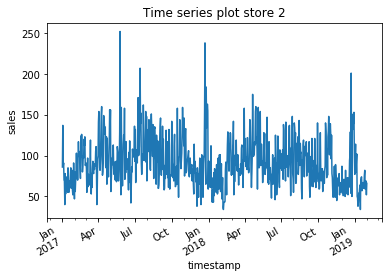

In [11]:
storeTwo['tot'].plot(subplots=True)
plt.title('Time series plot store 2')
plt.ylabel('sales')

Text(0,0.5,'sales')

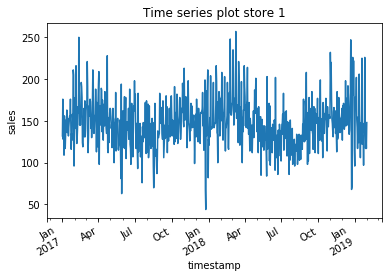

In [12]:
# drop the storeid
storeOne['tot'].plot(subplots=True)
plt.title('Time series plot store 1')
plt.ylabel('sales')

In [13]:
def linePlot(OutputData,gender):
    '''
    Input : Data Frame, gender
    Output: list containing data plots for each column
    
    This is to be used for line plot in plotly
    
    '''
    data = [] # list to store data set
    
    for i in OutputData.columns: # loop through columns
        
        if i != None: # skip the column with name Compounds. Since it is the x axis
            temp = 'trace' + i # name for the data points of column i if column i != 'Compounds'
            temp = go.Scatter(  # make a scatter points for plotly
            x = OutputData.index, # The x-axis
            y = OutputData[i], # the y acis
            mode = 'lines+markers', # markers
            name = i # name for the line
            )
        
            data.append(temp) # store in the list named data
    
    # layout for the plot
    layout = go.Layout( 
        title = 'Time Series Plot:  Sales  '+ gender + ' ',
        yaxis = dict(
        title = 'Sales'
        ),
        xaxis = dict(
        title = 'Age'
        )
    
    )
    return data, layout

In [19]:

data, layout = linePlot(storeOne.drop('storeId', axis=1),'Store ID 1')
fig = go.Figure(data=data,layout =layout)

offline.iplot(fig)

In [20]:

data, layout = linePlot(storeTwo.drop('storeId', axis=1),'Store ID 2')
fig = go.Figure(data=data,layout =layout)

offline.iplot(fig)

Text(0.5,1,'Rolling window plots store ID 2')

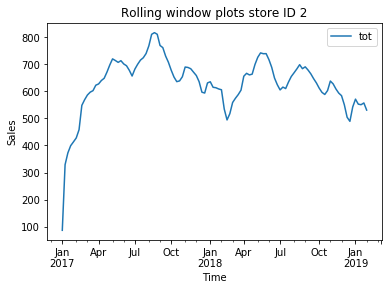

In [21]:

storeTwo.drop('storeId', axis=1).resample("1W").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Rolling window plots store ID 2')

Text(0.5,1,'One week Sampled Rolling window plots store ID 2')

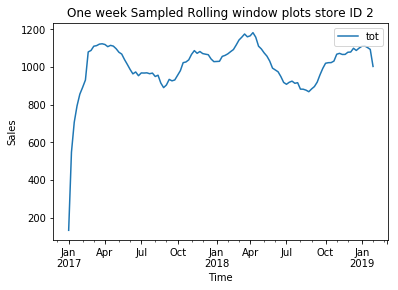

In [22]:
storeOne.drop('storeId', axis=1).resample("1W").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('One week Sampled Rolling window plots store ID 2')

###  Difference  and Histogram Plot


In [23]:
# Differencing makes the data more stationary

Text(0.5,1,'Histogram Plot Store One')

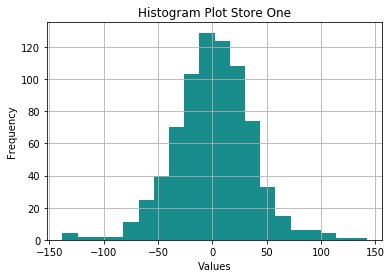

In [24]:
storeOne.drop('storeId', axis=1).diff().hist(color='teal', alpha=0.9, bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Plot Store One')

Text(0.5,1,'Histogram Plot Store 2')

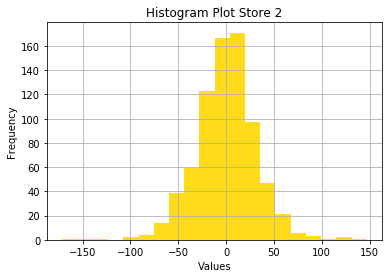

In [25]:
storeTwo.drop('storeId', axis=1).diff().hist(color='gold', alpha=0.9, bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Plot Store 2')

Text(0.5,1,'Histogram Plot Store 2')

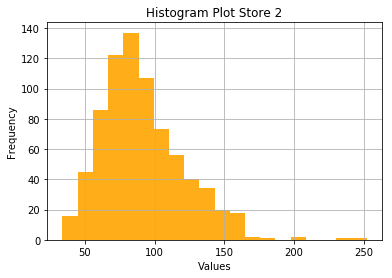

In [26]:
storeTwo.drop('storeId', axis=1).hist(color='orange', alpha=0.9, bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Plot Store 2')

Text(0.5,1,'Histogram Plot Store 1')

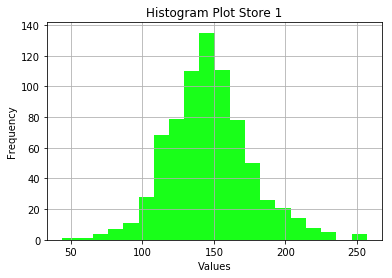

In [27]:
storeOne.drop('storeId', axis=1).hist(color='lime', alpha=0.9, bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Plot Store 1')

### Correlation Plot

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning:

'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.



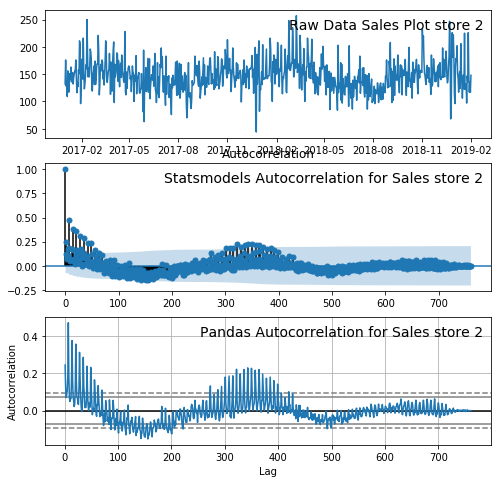

In [30]:
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics import tsaplots
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
axes[0].plot(storeOne.tot)
label(axes[0],'Raw Data Sales Plot store 2')



tsaplots.plot_acf(storeOne.tot.fillna(0), axes[1])
label(axes[1], 'Statsmodels Autocorrelation for Sales store 2')

pd.tools.plotting.autocorrelation_plot(storeOne.tot, ax=axes[2])
label(axes[2], 'Pandas Autocorrelation for Sales store 2')


plt.show()

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning:

'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.



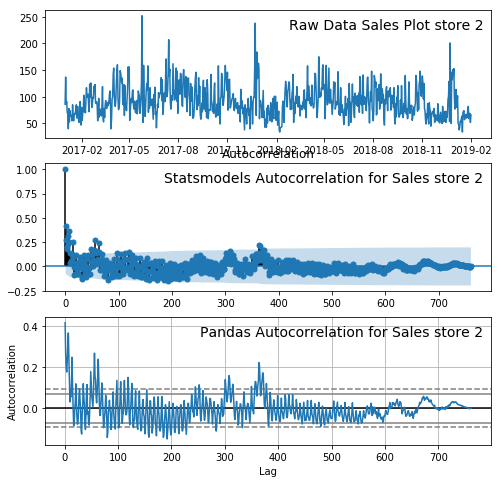

In [29]:
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics import tsaplots
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
axes[0].plot(storeTwo.tot)
label(axes[0],'Raw Data Sales Plot store 2')



tsaplots.plot_acf(storeTwo.tot.fillna(0), axes[1])
label(axes[1], 'Statsmodels Autocorrelation for Sales store 2')

pd.tools.plotting.autocorrelation_plot(storeTwo.tot, ax=axes[2])
label(axes[2], 'Pandas Autocorrelation for Sales store 2')


plt.show()

There are two ways to check the stationarity of a time series. The first is by looking at the data- which we can observe by viewing from the plots in the previous notebook. By plots of the data it should be easy to identify the changing mean or variation in the data.

A more accurate assessment is the Dickey-Fuller test. If the ‘Test Statistic’ is greater than the ‘Critical Value’ then the time series is stationary. 

In [31]:
#Test for Stationarity 
#Function to test for Stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

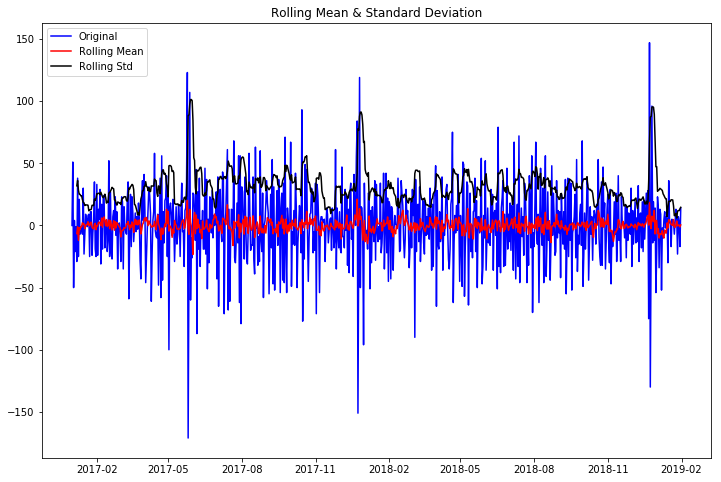

Results of Dickey-Fuller Test:
Test Statistic                -8.703250e+00
p-value                        3.759391e-14
#Lags Used                     1.900000e+01
Number of Observations Used    7.410000e+02
Critical Value (1%)           -3.439206e+00
Critical Value (5%)           -2.865448e+00
Critical Value (10%)          -2.568851e+00
dtype: float64


In [32]:
test_stationarity(storeTwo.tot.diff().fillna(0))


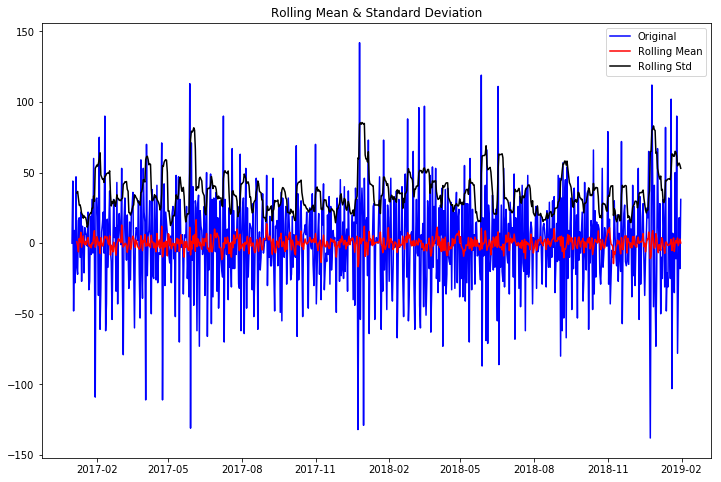

Results of Dickey-Fuller Test:
Test Statistic                -9.863052e+00
p-value                        4.183466e-17
#Lags Used                     1.900000e+01
Number of Observations Used    7.410000e+02
Critical Value (1%)           -3.439206e+00
Critical Value (5%)           -2.865448e+00
Critical Value (10%)          -2.568851e+00
dtype: float64


In [33]:
test_stationarity(storeOne.tot.diff().fillna(0))


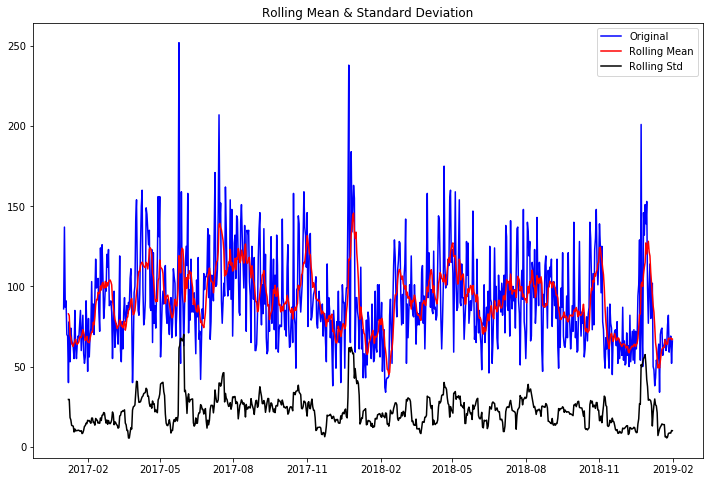

Results of Dickey-Fuller Test:
Test Statistic                  -4.786811
p-value                          0.000058
#Lags Used                      20.000000
Number of Observations Used    740.000000
Critical Value (1%)             -3.439218
Critical Value (5%)             -2.865454
Critical Value (10%)            -2.568854
dtype: float64


In [34]:
test_stationarity(storeTwo.tot)


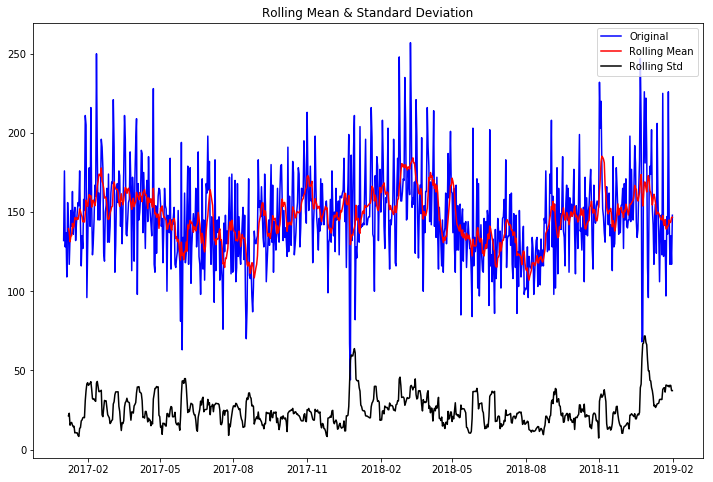

Results of Dickey-Fuller Test:
Test Statistic                  -3.003577
p-value                          0.034562
#Lags Used                      20.000000
Number of Observations Used    740.000000
Critical Value (1%)             -3.439218
Critical Value (5%)             -2.865454
Critical Value (10%)            -2.568854
dtype: float64


In [35]:
test_stationarity(storeOne.tot)


#### Partial Autocorrelation


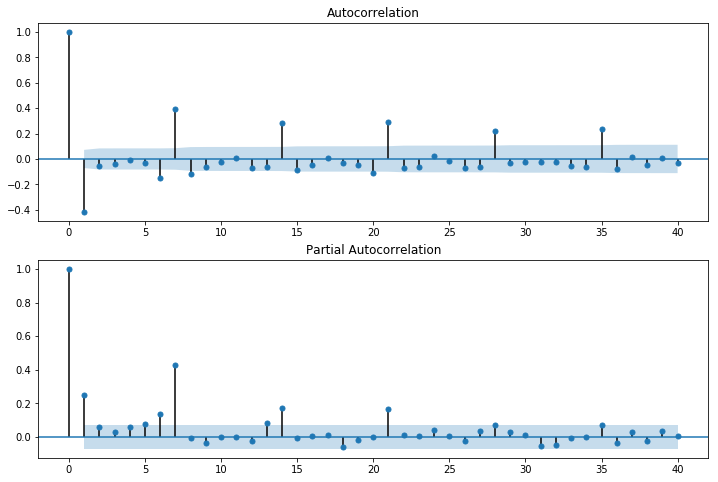

In [36]:
from pandas.tools.plotting import autocorrelation_plot
import statsmodels.api as sm  

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(storeOne['tot'].diff().iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(storeOne['tot'].iloc[13:], lags=40, ax=ax2)

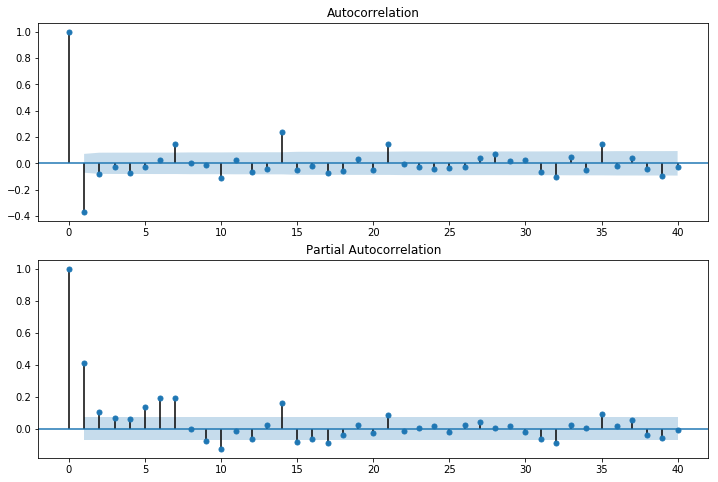

In [37]:
from pandas.tools.plotting import autocorrelation_plot
import statsmodels.api as sm  

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(storeTwo['tot'].diff().iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(storeTwo['tot'].iloc[13:], lags=40, ax=ax2)

# Trend Plot 

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



Store 1 trend plot


<Figure size 432x288 with 0 Axes>

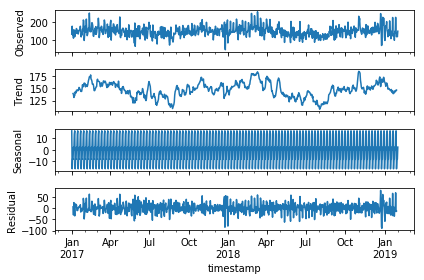

In [14]:
import statsmodels.api as sm  
import warnings
warnings.simplefilter(action = "ignore")
storeOne.tot.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(storeOne.tot,freq=7)  
fig = plt.figure()  
fig = result.plot()
print('Store 1 trend plot')


Store 2 treand plot


<Figure size 432x288 with 0 Axes>

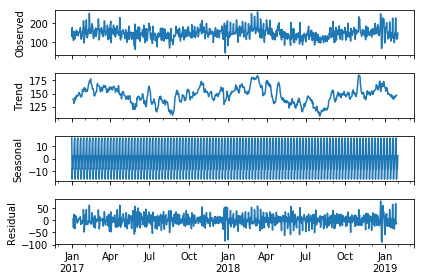

In [86]:
import statsmodels.api as sm  
import warnings
warnings.simplefilter(action = "ignore")
storeTwo.tot.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(storeOne.tot,freq=7)  
fig = plt.figure()  
fig = result.plot()
print('Store 2 treand plot')

# Training  Prediction Pipeline Base Models

### Store 1 : Training Basic ARIMA Models

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.


In [11]:
from statsmodels.tsa.arima_model import ARIMA


/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [12]:
storeOne_arima = storeOne.drop('storeId', 1)

In [13]:
storeOne_arima['tot'] = storeOne_arima['tot'].astype(float)


                             ARIMA Model Results                              
Dep. Variable:                  D.tot   No. Observations:                  760
Model:                 ARIMA(1, 1, 7)   Log Likelihood               -3568.612
Method:                       css-mle   S.D. of innovations             26.446
Date:                Sun, 31 Mar 2019   AIC                           7157.223
Time:                        13:19:59   BIC                           7203.557
Sample:                    01-02-2017   HQIC                          7175.065
                         - 01-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0026      0.098      0.026      0.979      -0.190       0.195
ar.L1.D.tot    -0.5410      0.102     -5.304      0.000      -0.741      -0.341
ma.L1.D.tot    -0.2319      0.096     -2.425    

Text(0,0.5,'sales')

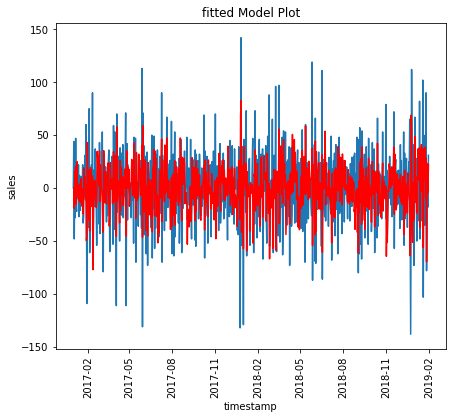

In [145]:
model = ARIMA(storeOne_arima.fillna(0), order=(1, 1, 7))  
results_MA= model.fit(disp=-1)  
plt.plot(storeOne_arima.diff().fillna(0))
print(results_MA.summary())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.plot(results_MA.fittedvalues, color='red', label ='fittedmodel')
plt.title('fitted Model Plot')
plt.xlabel('timestamp')
plt.ylabel('sales')

                             ARIMA Model Results                              
Dep. Variable:                  D.tot   No. Observations:                  760
Model:                 ARIMA(4, 1, 7)   Log Likelihood               -3549.082
Method:                       css-mle   S.D. of innovations             25.766
Date:                Sun, 31 Mar 2019   AIC                           7124.164
Time:                        13:33:09   BIC                           7184.397
Sample:                    01-02-2017   HQIC                          7147.359
                         - 01-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0029      0.086      0.033      0.973      -0.166       0.172
ar.L1.D.tot    -1.0538      0.172     -6.113      0.000      -1.392      -0.716
ar.L2.D.tot    -1.0860      0.233     -4.654    

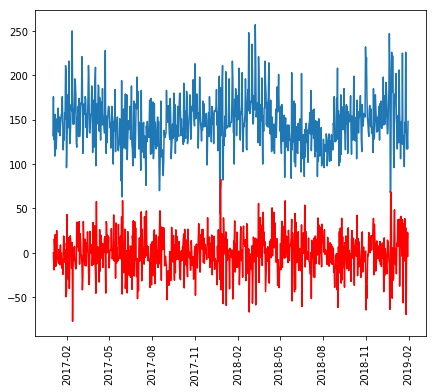

In [167]:
model = ARIMA(storeOne_arima, order=(4, 1, 7))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(storeOne_arima)
print(results_ARIMA.summary())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.plot(results_MA.fittedvalues, color='red')


### Make Predictions: Basic ARIMA Models  Store 1 Feb

In [180]:
AutoregressiveModelForecast = results_MA.forecast(28)
AutoregressiveModelForecast2 = results_ARIMA.forecast(28)


Text(0,0.5,'Sales')

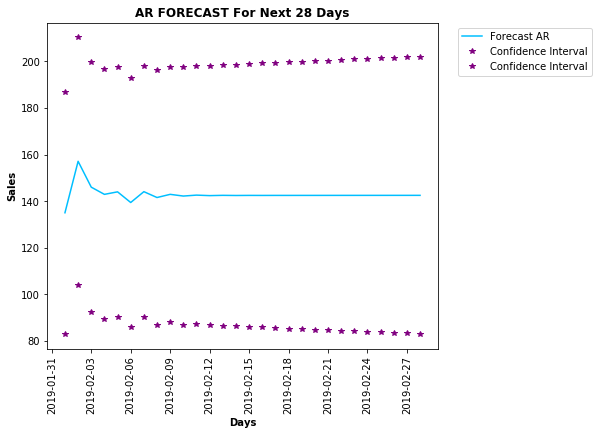

In [187]:
plt.rcParams["figure.figsize"] = (7,6)
xlabels = pd.date_range(start='2/1/2019', end='2/28/2019')

plt.plot(xlabels,AutoregressiveModelForecast[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(xlabels,AutoregressiveModelForecast[2],'r*',color='purple',label='Confidence Interval')
#plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("AR FORECAST For Next 28 Days", fontweight="bold")
plt.xlabel("Days",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
locs, labels = plt.xticks()

plt.setp(labels, rotation=90)
plt.ylabel("Sales",fontweight="bold")

Text(0,0.5,'Sales')

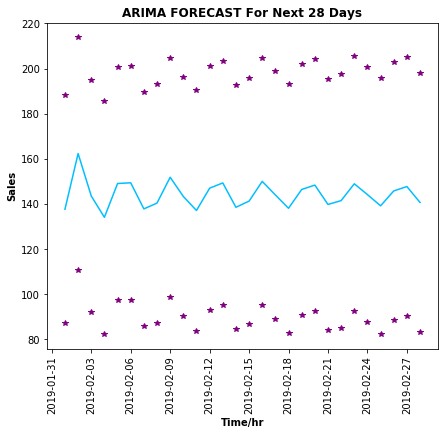

In [185]:
plt.rcParams["figure.figsize"] = (7,6)
xlabels = pd.date_range(start='2/1/2019', end='2/28/2019')

plt.plot(xlabels,AutoregressiveModelForecast2[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(xlabels,AutoregressiveModelForecast2[2],'r*',color='purple',label='Confidence Interval')
#plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("ARIMA FORECAST For Next 28 Days", fontweight="bold")
plt.xlabel("Time/hr",fontweight="bold" )
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel("Sales",fontweight="bold")

In [217]:
storeOneForecast_arima = pd.DataFrame(list(zip(xlabels, list(AutoregressiveModelForecast2[0]), [1]*28)), 
               columns =['timestamp', 'Sales Forecast','storeId']) 

In [218]:
storeOneForecast_ma = pd.DataFrame(list(zip(xlabels, list(AutoregressiveModelForecast[0]), [1]*28)), 
               columns =['timestamp', 'Sales Forecast','storeId']) 

In [219]:
storeOneForecast_ma.to_csv('storeOneForecast_ma', sep=',')
storeOneForecast_arima.to_csv('storeOneForecast_arima', sep=',')


# Store 2 Training and Prediction

### Training ARIMA Store 2

In [14]:
storeTwo_arima = storeTwo.drop('storeId', 1)
storeTwo_arima['tot'] = storeTwo_arima['tot'].astype(float) # for compuational compatibitlity


                             ARIMA Model Results                              
Dep. Variable:                  D.tot   No. Observations:                  760
Model:                 ARIMA(1, 1, 7)   Log Likelihood               -3557.422
Method:                       css-mle   S.D. of innovations             26.082
Date:                Sun, 31 Mar 2019   AIC                           7134.845
Time:                        14:22:13   BIC                           7181.178
Sample:                    01-02-2017   HQIC                          7152.687
                         - 01-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0349      0.285     -0.123      0.902      -0.594       0.524
ar.L1.D.tot    -0.6967      0.202     -3.443      0.001      -1.093      -0.300
ma.L1.D.tot     0.0533      0.202      0.264    

Text(0,0.5,'sales')

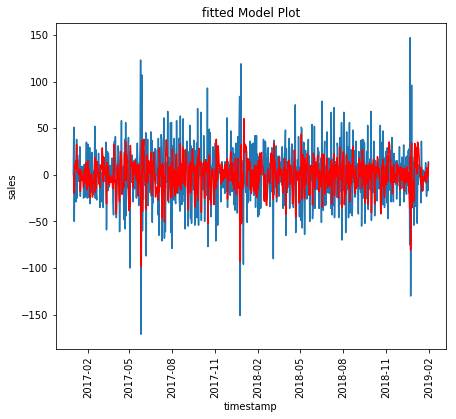

In [227]:
model = ARIMA(storeTwo_arima, order=(1, 1, 7))  
results_MA_2= model.fit(disp=-1)  
plt.plot(storeTwo_arima.diff().fillna(0))
print(results_MA_2.summary())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.plot(results_MA_2.fittedvalues, color='red', label ='fittedmodel')
plt.title('fitted Model Plot')
plt.xlabel('timestamp')
plt.ylabel('sales')

                             ARIMA Model Results                              
Dep. Variable:                  D.tot   No. Observations:                  760
Model:                 ARIMA(4, 1, 7)   Log Likelihood               -3522.205
Method:                       css-mle   S.D. of innovations             24.861
Date:                Sun, 31 Mar 2019   AIC                           7070.409
Time:                        14:31:20   BIC                           7130.642
Sample:                    01-02-2017   HQIC                          7093.604
                         - 01-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0244      0.206     -0.119      0.906      -0.428       0.379
ar.L1.D.tot    -0.2201      0.206     -1.070      0.285      -0.623       0.183
ar.L2.D.tot     0.2595      0.138      1.878    

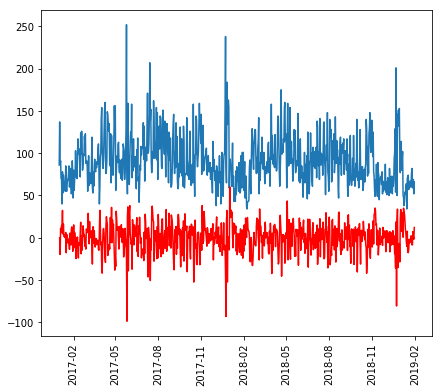

In [240]:
model = ARIMA(storeTwo_arima, order=(4, 1, 7))  
results_ARIMA_2 = model.fit(disp=-1)  
plt.plot(storeTwo_arima)
print(results_ARIMA_2.summary())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.plot(results_MA_2.fittedvalues, color='red')


### Predictions for store 2 ARIMA Models

In [241]:
# make forecast
AutoregressiveModelForecast_2 = results_MA_2.forecast(28)
AutoregressiveModelForecast2_2 = results_ARIMA_2.forecast(28)

Text(0,0.5,'Sales')

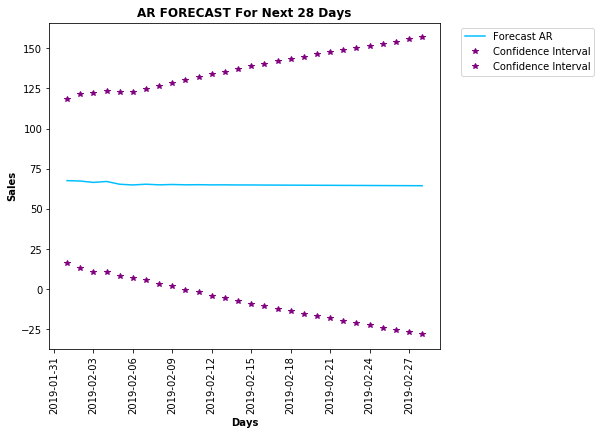

In [242]:
# plot models
plt.rcParams["figure.figsize"] = (7,6)
xlabels = pd.date_range(start='2/1/2019', end='2/28/2019')

plt.plot(xlabels,AutoregressiveModelForecast_2[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(xlabels,AutoregressiveModelForecast_2[2],'r*',color='purple',label='Confidence Interval')
#plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("AR FORECAST For Next 28 Days", fontweight="bold")
plt.xlabel("Days",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
locs, labels = plt.xticks()

plt.setp(labels, rotation=90)
plt.ylabel("Sales",fontweight="bold")

Text(0,0.5,'Sales')

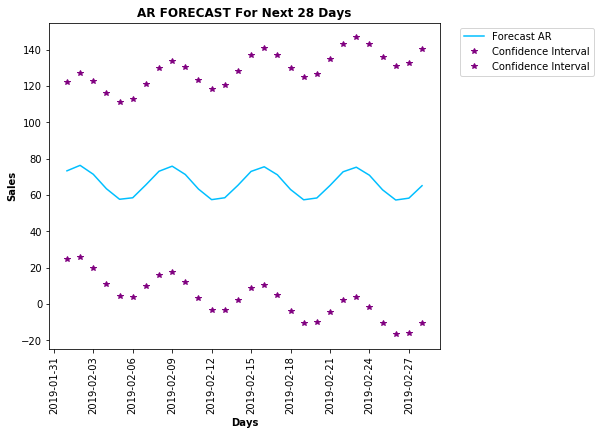

In [244]:
# plot second m
plt.rcParams["figure.figsize"] = (7,6)
xlabels = pd.date_range(start='2/1/2019', end='2/28/2019')

plt.plot(xlabels,AutoregressiveModelForecast2_2[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(xlabels,AutoregressiveModelForecast2_2[2],'r*',color='purple',label='Confidence Interval')
#plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("AR FORECAST For Next 28 Days", fontweight="bold")
plt.xlabel("Days",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
locs, labels = plt.xticks()

plt.setp(labels, rotation=90)
plt.ylabel("Sales",fontweight="bold")

In [245]:
# save model
#xlabels = pd.date_range(start='2/1/2019', end='2/28/2019')

storeOneForecast_arima_2 = pd.DataFrame(list(zip(xlabels, list(AutoregressiveModelForecast2_2[0]), [1]*28)), 
               columns =['timestamp', 'Sales Forecast','storeId']) 
storeOneForecast_ma_2 = pd.DataFrame(list(zip(xlabels, list(AutoregressiveModelForecast_2[0]), [1]*28)), 
               columns =['timestamp', 'Sales Forecast','storeId']) 

In [246]:
# save model
xlabels = pd.date_range(start='2/1/2019', end='2/28/2019')

storeOneForecast_arima_2 = pd.DataFrame(list(zip(xlabels, list(AutoregressiveModelForecast2_2[0]), [1]*28)), 
               columns =['timestamp', 'Sales Forecast','storeId']) 
storeOneForecast_ma_2 = pd.DataFrame(list(zip(xlabels, list(AutoregressiveModelForecast_2[0]), [1]*28)), 
               columns =['timestamp', 'Sales Forecast','storeId']) 
storeOneForecast_ma_2.to_csv('storeOneForecast_ma_store2', sep=',')
storeOneForecast_arima_2.to_csv('storeOneForecast_arima_store2', sep=',')

### Modelling with LSTM

In [13]:
storeTwo_arima = storeTwo.drop('storeId', 1)
storeTwo_arima['tot'] = storeTwo_arima['tot'].astype(float) # for compuational compatibitlity

In [14]:
storeOne_arima = storeOne.drop('storeId', 1)
storeOne_arima['tot'] = storeOne_arima['tot'].astype(float)


In [15]:
storeOneList = storeOne_arima.tot.tolist() # convert store one to list

In [16]:

counter=0
def dataGetter(datalist):
    """
    Returns a single sales value.
    Input: Sales Data list named 
    Output: single Sales value
    """
    global counter;
    assert type(datalist) == list;
    
    
    value = datalist[counter]
    #print(counter)


    counter = counter +1
             
    return np.array([value])

In [17]:
# Define window size or learning
sliding_window = []
lag=8 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    sliding_window.append(dataGetter(storeOneList))

In [18]:
sliding_window

[array([ 132.]),
 array([ 176.]),
 array([ 128.]),
 array([ 137.]),
 array([ 109.]),
 array([ 156.]),
 array([ 139.])]

In [19]:
def get_pair(Target):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    """
 
    global sliding_window
    sliding_window.append(dataGetter(Target))
    #print(len(sliding_window))
    
    input_value = sliding_window[0:7]
    
    input_value=np.array(input_value)
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,7))
    ##print(input_value)
    output_value = sliding_window[-1]
    ##print(output_value)
    sliding_window = sliding_window[1:]
    #print(len(sliding_window))
    return input_value, output_value.reshape(1,)

In [20]:

#Imports
import tensorflow as tf
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

In [21]:
#Input Params
with tf.name_scope("input_target_placeholders"):    
    input_dim = 1
    ##The Input Layer as a Placeholder
    #Since we will provide data sequentially, the 'batch size'
    #is 1.
    input_layer = tf.placeholder(tf.float32, [1, input_dim*7],name="input_data")
    correct_output = tf.placeholder(tf.float32, [input_dim],name="target_data")

In [200]:
with tf.variable_scope("lstmLayer",reuse=tf.AUTO_REUSE ):    
    lstm_layer1 = rnn_cell.BasicLSTMCell(input_dim*1026,state_is_tuple=False)
    #lstm_layer1 = rnn_cell.BasicLSTMCell(input_dim*1,state_is_tuple=True)

    #The LSTM state as a Variable initialized to zeroes
    lstm_state1 = tf.Variable(tf.zeros([1, lstm_layer1.state_size]),trainable=False,name="initial_state")
    #lstm_state1 = tf.Variable(lstm_layer1.zero_state(1,lstm_layer1.state_size[-1] ), trainable=False)
    #Connect the input layer and initial LSTM state to the LSTM cell
    lstm_output1, lstm_state_output1 = lstm_layer1(input_layer, lstm_state1)
    #The LSTM state will get updated
    outputs = lstm_state1.assign(lstm_state_output1)

In [203]:
lstm_output1

<tf.Tensor 'lstmLayer_11/basic_lstm_cell/Mul_2:0' shape=(1, 1026) dtype=float32>

In [202]:
lstm_output1.shape

TensorShape([Dimension(1), Dimension(1026)])

In [204]:
with tf.name_scope("weight_Bias_learning_rate"):
    global_step = tf.Variable(0, trainable=False,name="global_step")
    starter_learning_rate = 1e-6
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           1000, 0.8, staircase=False,name ="Exponential_decay")
    ##The Regression-Output Layer
    #The Weights and Biases matrices first
    output_W1 = tf.Variable(tf.truncated_normal([int(lstm_output1.shape[1]), 1]),name="weight")
    output_b1 = tf.Variable(tf.truncated_normal([input_dim]),name="bias")


In [206]:
with tf.name_scope("prediction"):
    #Compute the output
    final_output = tf.matmul(lstm_output1, output_W1) + output_b1

In [207]:

lambda_l2_reg=0.5 
l2 = lambda_l2_reg * sum( tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables() if not ("noreg" in tf_var.name or "bias" in tf_var.name) )

In [208]:

with tf.name_scope("RMS_error"):
    ##Calculate the Sum-of-Squares Error
    error = tf.pow(tf.subtract(final_output, correct_output), 2)+l2

In [209]:
with tf.variable_scope("optimizer",reuse=tf.AUTO_REUSE ):    
    ##The Optimizer
    #Adam works best
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)

In [210]:
# Create a summary to monitor MSE
mse=tf.summary.tensor_summary("errors_Summary",error)
# Create a summary to monitor  predictions
prediction=tf.summary.tensor_summary("predictions_Summmary", final_output)
# Create a summary to monitor bias
bias_vec=tf.summary.tensor_summary("bias", output_b1)
# create sumary
#rate_vec=tf.summary.scalar("rate", learning_rate)


#histogram plot

error_stats=tf.summary.histogram("errors_Histogram",error)
weight_stats=tf.summary.histogram("weights_Histogram",output_W1)
bias_stats=tf.summary.histogram("biases_Histogram",output_b1)
#learning_stats=tf.histogram_summary("biases_Histogram",learning_rate)


#merged_summary_op =  tf.merge_all_summaries()
merged_summary_op =   tf.summary.merge([mse,prediction,bias_vec,error_stats,weight_stats,bias_stats])

In [211]:
##Session
sess = tf.Session()
#Initialize all Variables
sess.run(tf.global_variables_initializer())

In [212]:
logs_path = './lstm/'


In [213]:
##Training Parameters
n_iter = 720 
inner_iter = 720
actual_output1 = []
network_output1 = []
validation_prediction=[];
validation_target =[];
lower_bound=0;
upper_bound=700;
prediction_window=7

In [214]:

import copy
#new_list = copy.deepcopy(old_list)
Test_eval=copy.deepcopy(storeOneList[720:])

In [215]:

sliding_window

[array([ 136.]),
 array([ 226.]),
 array([ 148.]),
 array([ 117.]),
 array([ 135.]),
 array([ 117.]),
 array([ 148.])]

In [216]:
error_=[]
iteration_time = 1000
    
tf.summary.FileWriter

writer = tf.summary.FileWriter(logs_path, graph= tf.get_default_graph()) 

counter =0 
assert counter==0
for i in range(5):
    counter = 0
    for i in range(n_iter):
            input_v, output_v = get_pair(storeOneList)
            _, _, network_output,errors,summary = sess.run([outputs,
                                         train_step,
                                         final_output,error,merged_summary_op],
                                        feed_dict = {
                                            input_layer: input_v,
                                            correct_output: output_v})
            writer.add_summary(summary)
            error_.append(errors)
            if i%inner_iter==0 & i!=0:
                assert i!=0;
                sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))

                for j in range(len(Test_eval[lower_bound:upper_bound])):
                    input_val, output_val = get_pair(Test2)
                    _, network_output = sess.run([outputs,
                                          final_output],
                                         feed_dict = {
                                         input_layer: input_val,
                                         correct_output: output_val})
                    lower_bound= lower_bound+prediction_window;
                    upper_bound = upper_bound + prediction_window;
                    validation_target.append(output_val)
                    validation_prediction.append(network_output1)
            #sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))

            actual_output1.append(output_v)
            #actual_output2.append(output_v[0][1])
            network_output1.append(network_output)
            #network_output2.append(network_output[0][1])
            #x_axis.append(i)

In [217]:
k = list(error_)
errorplot = np.array(k[:700]) # make errors into arrays
errorplot.shape

(700, 1, 1)

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



Text(0.5,0,'Training example')

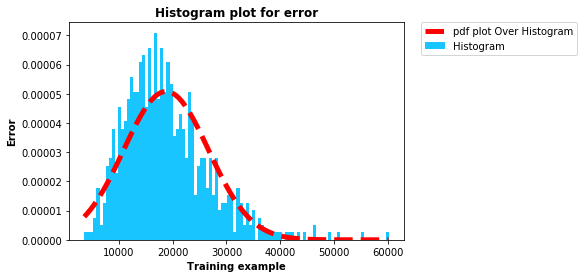

In [218]:
import matplotlib.mlab as mlab

fig, ax = plt.subplots()
n, bins, patches=plt.hist(errorplot.reshape(700,),100,normed=1,facecolor='deepskyblue',alpha=0.9,label='Histogram')
mu= np.mean(errorplot);sigma=np.std(errorplot);
y = mlab.normpdf( bins,mu,sigma)
#y = mlab.normpdf( bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth=5,label="pdf plot Over Histogram")
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Histogram plot for error",fontweight='bold')
plt.ylabel("Error",fontweight='bold')
plt.xlabel("Training example",fontweight='bold')

# Preditionsm

In [219]:
validation_set = storeOneList[721:]
counter = 0 # reset counter 
sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [220]:
actual_output_test = []
network_output_test = []

 
for i in range(len(validation_set)):
    input_v, output_v = get_pair(validation_set)
    #print(input_v, output_v)
    _, network_output = sess.run([outputs,
                                  final_output],
                                 feed_dict = {
                                     input_layer: input_v,
                                     correct_output: output_v})
        
 
    actual_output_test.append(output_v)
    #print(network_output)
    network_output_test.append(network_output)

In [221]:
np.array(network_output_test).shape

(40, 1, 1)

<Figure size 2160x144 with 0 Axes>

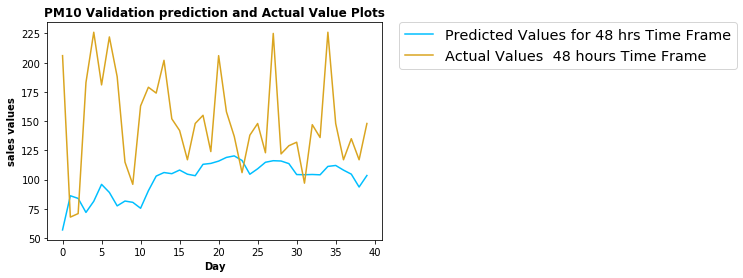

In [222]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test).reshape(40,1), 'r-',color = 'deepskyblue',label='Predicted Values for 48 hrs Time Frame')
ax.plot( np.array(actual_output_test).reshape(40,1), 'b-',color = 'goldenrod',label='Actual Values  48 hours Time Frame')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='x-large')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")


plt.title("PM10 Validation prediction and Actual Value Plots",fontweight='bold')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
plt.ylabel("sales values",fontweight='bold')
plt.xlabel("Day",fontweight='bold')

#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

# Testing 

In [223]:

n_list = 28;
Feature_eval=copy.deepcopy(Test_eval[-7:])

In [224]:
def get_pair_Test(Target):
    """
    Returns an (current, target) 
    Target is lag steps 24 ahead of current
    """
 
    
    global sliding_window_test
    #sliding_window_test.append(dataGetter(Target))
    #print(len(sliding_window))
    #sliding_window_featureset.append(dataGetter_target(Target2))
    
    #input_value = sliding_window_test
    
    
    input_value=np.array(sliding_window_test)
    #print(input_value.shape)
    
    #print(input_value.shape)
    input_value=np.reshape(input_value,(1,len(sliding_window_test)))
    mx = np.ma.masked_invalid(input_value)
    
    ##print(input_value)
    #output_value = sliding_window[-1]
    #my = np.ma.masked_invalid(output_value)
    ####remove last value from sliding_window
    #_ = sliding_window_featureset[-1]
    ##print(output_value)
   # sliding_window = sliding_window[1:]
    #sliding_window_featureset = sliding_window_featureset[1:]
    #print(len(sliding_window))
    # Process output
    mask_x = ~mx.mask # let mask return true for those non-nan values
    ## y output
    #mask_y =~my.mask
    #mask_yfloat = mask_y
    return input_value

In [225]:
counter_test=0;
def dataGetter_test(datalist):
    """
    Returns a single PM10 value.
    Input: PM10 Data list named Target_list above
    Output: single PM10 value
    """
    global counter_test;
    assert type(datalist) == list;
    
    
    value = datalist[counter_test]
    #print(counter)


    counter_test = counter_test +1
             
    return value

In [226]:

previous_sliding_window_length=28;
time_step_shift = 7;

In [227]:
#sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])));


In [228]:
sliding_window_test = []
lag=8 # 24 hours time step from 0 to 24 plus the window_step_move (25) which is to be predicted
window_move_step = 1
for i in range(lag - window_move_step):
    temp=dataGetter_test(Feature_eval)
    
    sliding_window_test.append(temp);

In [229]:
 
sess.run(lstm_state1.assign(tf.zeros([1, lstm_layer1.state_size])))


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [230]:

#actual_output_test = []
network_output_test = []

 
for i in range(previous_sliding_window_length):
   
    input_v = get_pair_Test(sliding_window_test)
    _, network_output = sess.run([outputs,
                                  final_output],
                                 feed_dict = {
                                     input_layer: input_v})
       
    
    sliding_window_test.append( network_output[0]) # append new values for prediction
    #print(len(sliding_window_test))
    sliding_window_test.pop(0) # remove the first value of the list 
    #print(len(sliding_window_test))
    time_step_shift = time_step_shift + 1; # increae the time step
    network_output_test.append(network_output)

In [231]:
#network_output_test

<Figure size 2160x144 with 0 Axes>

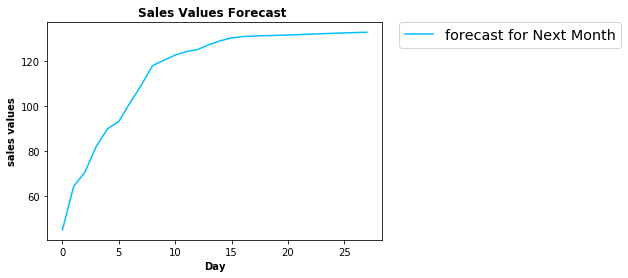

In [239]:
import matplotlib.pyplot 


fig = plt.figure(figsize=(30, 2))

fig, ax = plt.subplots()
ax.plot( np.array(network_output_test).reshape(28,1), 'r-',color = 'deepskyblue',label='forecast for Next Month')
#ax.plot( np.array(actual_output_test).reshape(40,1), 'b-',color = 'goldenrod',label='Actual Values  48 hours Time Frame')
#ax.xaxis.set_minor_locator(dates.MonthLocator())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='x-large')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.DayLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%a %H:%M:%S'))
#ax.xaxis.grid(True, which="minor")


plt.title("Sales Values Forecast ",fontweight='bold')
#ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%a\%b\%Y'))
plt.ylabel("sales values",fontweight='bold')
plt.xlabel("Day",fontweight='bold')

#plt.xticks( rotation=25 )
#plt.tight_layout()

plt.show()

In [237]:
forecast= list(np.array(network_output_test).reshape(28)) # save forecast as list

In [240]:
# save model
xlabels = pd.date_range(start='2/1/2019', end='2/28/2019')

lstm_store_1 = pd.DataFrame(list(zip(xlabels, forecast, [1]*28)), 
               columns =['timestamp', 'Sales Forecast','storeId']) 

lstm_store_1.to_csv('lstm_store_1_forecast', sep=',')

In [241]:
# Only store 1 is presented here with LSTM.
# The same pipeline follows here for store 2 

# Conclusion
LSTM works fine on Time series but one needs care so that things do not blow up.
On a very suphiscated machine, this model could work impeccably well.
ARIMA,SARIMA are also very powerful models but they have less representational power compared to lstm
